<a href="https://colab.research.google.com/github/Bhagya15shree/BITS_Recommendation_System/blob/main/Image_Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [ ]:
(trainx,trainy),(testx,testy)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
trainx.shape,testx.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

<Figure size 1000x1000 with 0 Axes>

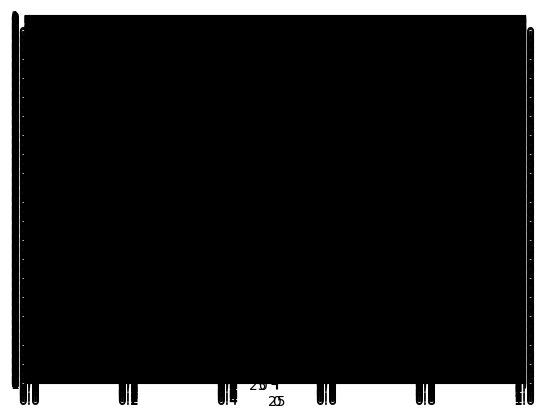

<Figure size 1000x1000 with 0 Axes>

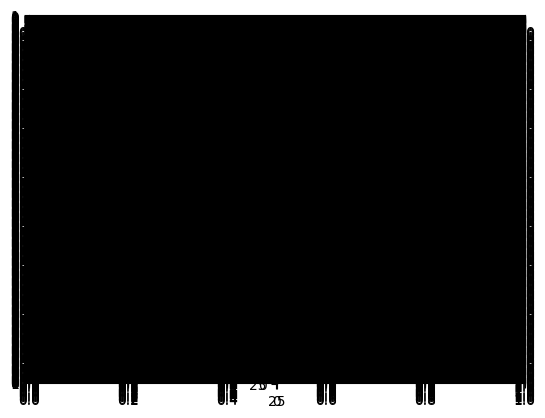

<Figure size 1000x1000 with 0 Axes>

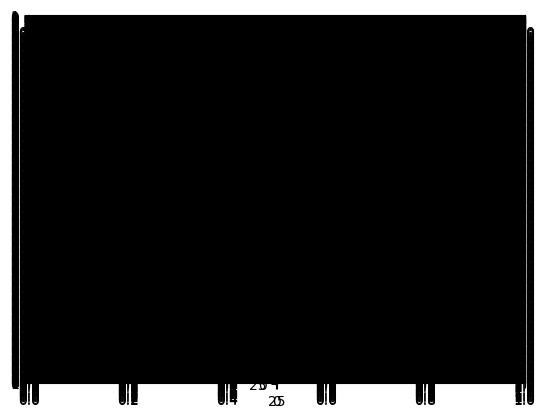

<Figure size 1000x1000 with 0 Axes>

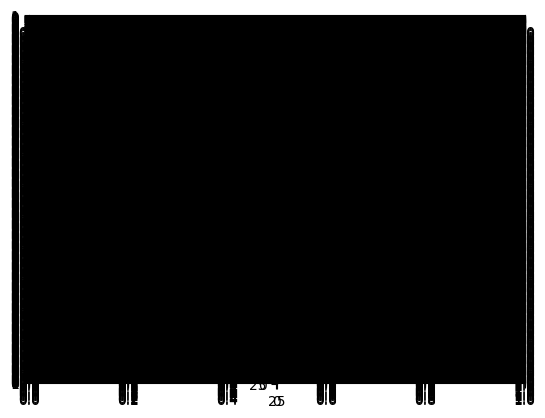

<Figure size 1000x1000 with 0 Axes>

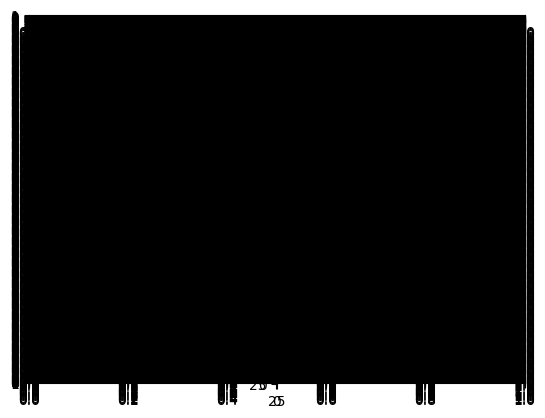

<Figure size 1000x1000 with 0 Axes>

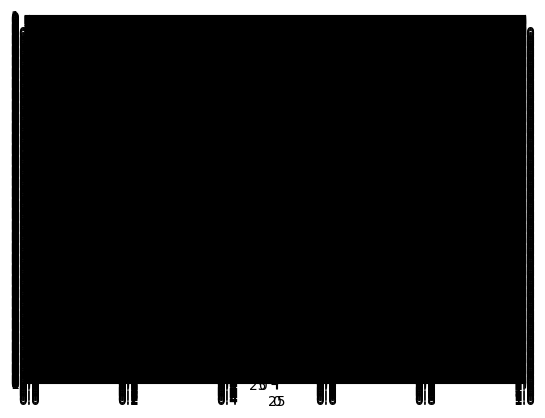

<Figure size 1000x1000 with 0 Axes>

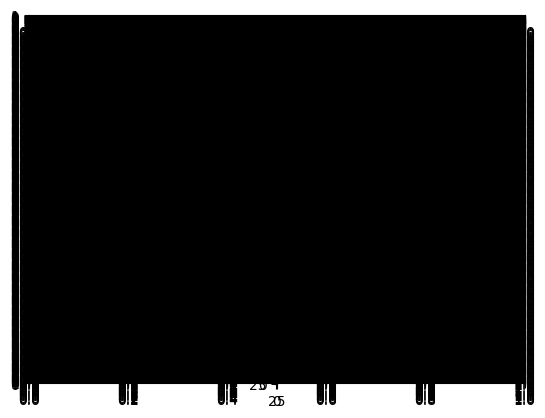

<Figure size 1000x1000 with 0 Axes>

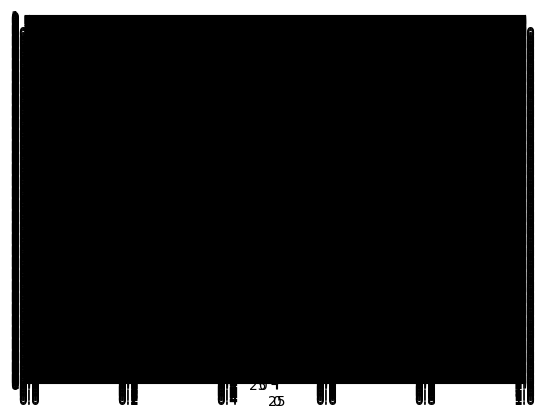

<Figure size 1000x1000 with 0 Axes>

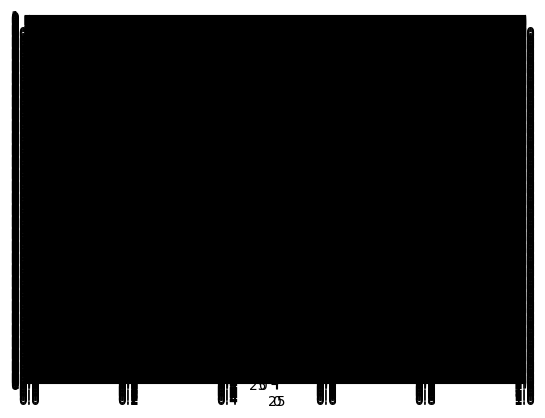

In [ ]:
for i in range(9):
  plt.figure(figsize=(10,10))
  plt.subplots(330 + 1 + i)
  plt.imshow(trainx[i])
  plt.show()


In [ ]:
trainx=trainx.reshape((trainx.shape[0],32,32,3))
testx=testx.reshape((testx.shape[0],32,32,3))
trainy=to_categorical(trainy)
testy=to_categorical(testy)
trainy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_norm=trainx.astype('float32')
test_norm=testx.astype('float32')
train_norm=train_norm/255.0
test_norm=test_norm/255.0

In [ ]:
x_train,x_test,y_train,y_test=train_norm,test_norm,trainy,testy

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
def define_model():
  model=Sequential()
  model.add(Flatten(input_shape=(32,32,3)))
  model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt=SGD(learning_rate=0.01,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  model.summary()
  return model
model=define_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3738506 (14.26 MB)
Trainable params: 3738506 (14.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8641 - accuracy: 0.3215 - val_loss: 1.8442 - val_accuracy: 0.3386
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6926 - accuracy: 0.3887 - val_loss: 1.6687 - val_accuracy: 0.4002
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6146 - accuracy: 0.4206 - val_loss: 1.5614 - val_accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5494 - accuracy: 0.4412 - val_loss: 1.5509 - val_accuracy: 0.4451
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5062 - accuracy: 0.4593 - val_loss: 1.5151 - val_accuracy: 0.4598
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4678 - accuracy: 0.4736 - val_loss: 1.4771 - val_accuracy: 0.4764
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4258 - accuracy: 0.4897 - val_loss: 1.4786 - val_accuracy

In [ ]:
_,acc=model.evaluate(x_test,y_test,verbose=0)
print('>%.3f'%(acc*100.0))

>48.510


In [ ]:
acc

0.48510000109672546

In [ ]:
scores,histories=list(),list()
scores.append(acc)
histories.append(history)


Accuracy:mean=48.510 std=0.000,n=1


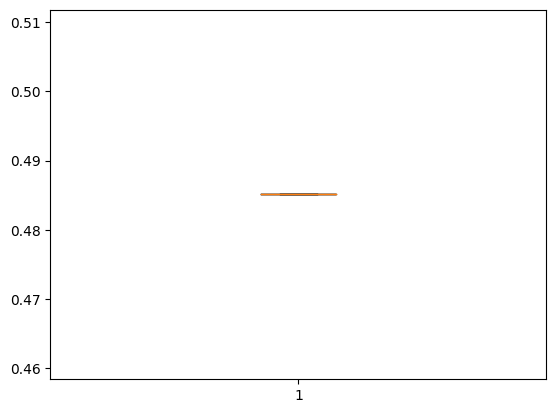

In [ ]:
print('Accuracy:mean=%.3f std=%.3f,n=%d'%(np.mean(scores)*100,np.std(scores)*100,len(scores)))
plt.boxplot(scores)
plt.show()

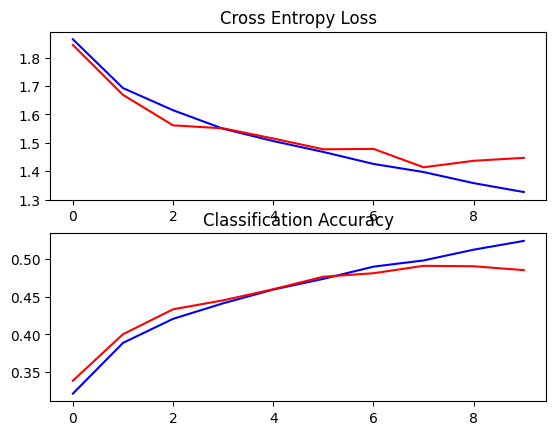

In [ ]:
for i in range(len(histories)):
  plt.subplot(2,1,1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'],color='blue',label='train')
  plt.plot(histories[i].history['val_loss'],color='red',label='test')
  plt.subplot(2,1,2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'],color='blue',label='train')
  plt.plot(histories[i].history['val_accuracy'],color='red',label='test')
  plt.show()